In [ ]:
WEEK-6

In [3]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")
df.head(7)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical Impact
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teen,Physical Impact
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-teens,Physical Impact
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,No Health Impact
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teen,"Physical, Mental Impact"
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Teenagers,Physical Impact
6,17,Male,2.97,TV,False,0.48,No Health Impact,Rural,Late-teens,No Health Impact


In [5]:
# Average screen time across key segments
seg_summary = df.groupby(['Age', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].agg(['mean','median','count']).reset_index()
seg_summary = seg_summary.sort_values('mean', ascending=False)
display(seg_summary.head(7))

,Age,Primary_Device,mean,median,count
31,16,TV,4.655989,4.730,187
19,13,TV,4.652760,4.775,192
29,16,Laptop,4.648941,4.505,170
36,17,Tablet,4.623488,4.600,86
22,14,Smartphone,4.620000,4.690,452
14,12,Smartphone,4.601027,4.695,438
33,17,Laptop,4.580221,4.740,181


In [7]:
# Segment-wise Summary Tables

print(" Average Screen Time by Age:")
print(df.groupby("Age")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Gender:")
print(df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Primary Device:")
print(df.groupby("Primary_Device")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Health Impacts:")
print(df.groupby("Health_Impacts")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Urban/Rural Segment:")
print(df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")


 Average Screen Time by Age:
Age
8     3.99
9     3.93
10    3.85
11    4.50
12    4.55
13    4.50
14    4.51
15    4.44
16    4.55
17    4.56
18    4.50
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Gender:
Gender
Female    4.33
Male      4.38
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Primary Device:
Primary_Device
Laptop        4.46
Smartphone    4.39
TV            4.29
Tablet        4.23
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Health Impacts:
Health_Impacts
Anxiety                                          4.90
Anxiety, Obesity Risk                            4.65
Eye Strain                                       4.81
Eye Strain, Anxiety                              5.08
Eye Strain, Anxiety, Obesity Risk                4.99
Eye Strain, Obesity Risk                         4.95
No Health Impact                                 3.21
Obesity Risk                                     4.91
Poor Sleep     

In [9]:
# Age Group × Gender
df.groupby(['Age', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean()

# Device Type × Age Group
df.groupby(['Primary_Device', 'Age'])['Avg_Daily_Screen_Time_hr'].mean()

# Health Status × Age Group
df.groupby(['Health_Impacts', 'Age'])['Avg_Daily_Screen_Time_hr'].mean()

# Urban/Rural × Device Type
df.groupby(['Urban_or_Rural', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean()

Urban_or_Rural  Primary_Device
Rural           Laptop            4.387252
                Smartphone        4.397295
                TV                4.293812
                Tablet            4.432117
Urban           Laptop            4.487289
                Smartphone        4.385523
                TV                4.285161
                Tablet            4.128894
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [12]:
# Mean screen time by each health status
df.groupby('Health_Impacts')['Avg_Daily_Screen_Time_hr'].mean()

# Compare mental vs. no health impacts
df.pivot_table(index='Health_Impacts', values='Avg_Daily_Screen_Time_hr', aggfunc='mean')

,Avg_Daily_Screen_Time_hr
Health_Impacts,
Anxiety,4.903403
"Anxiety, Obesity Risk",4.648841
Eye Strain,4.809301
"Eye Strain, Anxiety",5.081185
"Eye Strain, Anxiety, Obesity Risk",4.993429
"Eye Strain, Obesity Risk",4.949811
No Health Impact,3.213254
Obesity Risk,4.911151
Poor Sleep,4.955445


In [29]:
 Standard deviation (variability)
df.groupby('Age')['Avg_Daily_Screen_Time_hr'].agg(['mean', 'std', 'min', 'max']

IndentationError: unexpected indent (2128940050.py, line 1)

In [17]:
corr_table = df.corr(numeric_only=True).round(2)
corr_table

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.00,0.12,0.16,-0.49
Avg_Daily_Screen_Time_hr,0.12,1.00,0.66,-0.09
Exceeded_Recommended_Limit,0.16,0.66,1.00,-0.13
Educational_to_Recreational_Ratio,-0.49,-0.09,-0.13,1.00


In [19]:
variance_table = (
    df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr']
    .agg(['mean', 'std'])
    .assign(Variance_Index=lambda x: (x['std'] / x['mean']).round(2))
)
variance_table

,mean,std,Variance_Index
Primary_Device,,,
Laptop,4.459086,1.205062,0.27
Smartphone,4.388925,1.651845,0.38
TV,4.287752,1.923681,0.45
Tablet,4.226005,1.996953,0.47


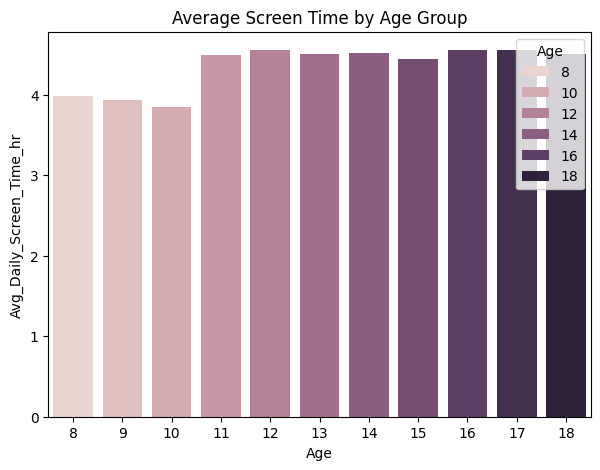

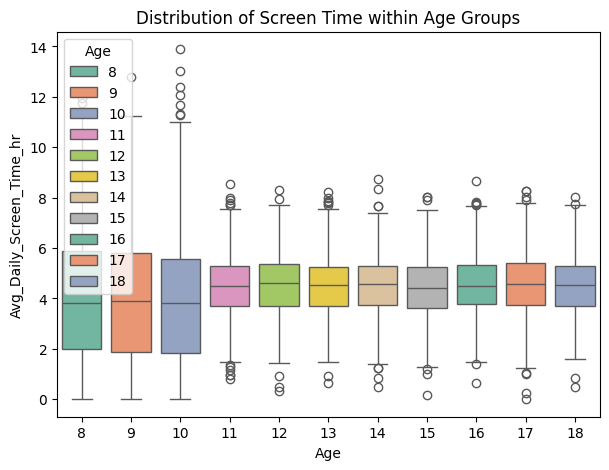

Insight:
Teenagers and Late Teens have the highest average screen time (~4.5 hrs), while Pre-Teens spend the least (~4.2 hrs).
Older age groups have more autonomy and access, driving longer usage times.



In [20]:
# Age Group vs Screen Time (Bar + Boxplot)

plt.figure(figsize=(7,5))
sns.barplot(x="Age", y="Avg_Daily_Screen_Time_hr", hue="Age", data=df, errorbar=None)
plt.title("Average Screen Time by Age Group")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Age", y="Avg_Daily_Screen_Time_hr", hue="Age",data=df, palette="Set2")
plt.title("Distribution of Screen Time within Age Groups")
plt.show()

print("Insight:")
print("Teenagers and Late Teens have the highest average screen time (~4.5 hrs), while Pre-Teens spend the least (~4.2 hrs).")
print("Older age groups have more autonomy and access, driving longer usage times.\n")

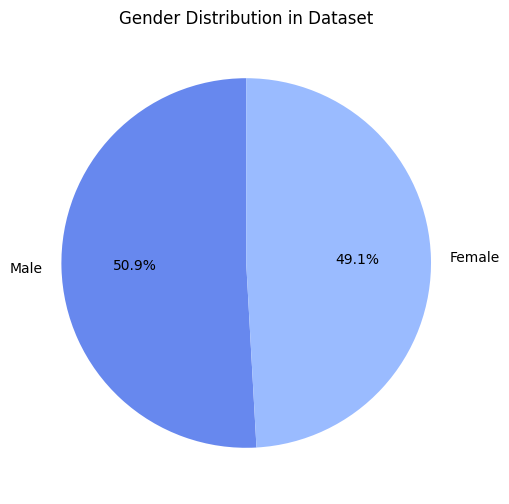

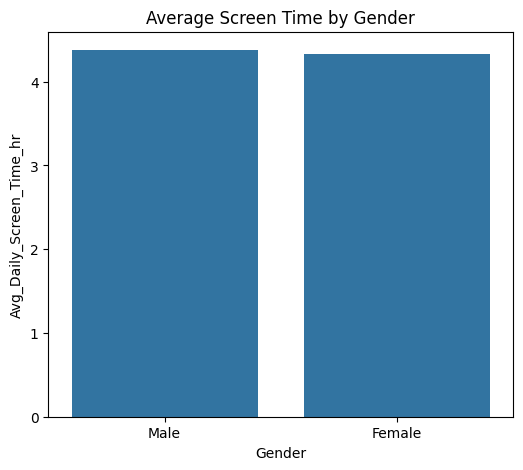

Insight:
Males (~4.39 hrs) and Females (~4.35 hrs) spend almost equal time on screens.
This shows that digital behavior is now balanced across genders, with no major differences.



In [21]:
#  Gender vs Screen Time (Pie + Bar)

# Pie Chart
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm"))
plt.title("Gender Distribution in Dataset")
plt.show()

# Bar Chart
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Gender")
plt.show()

print("Insight:")
print("Males (~4.39 hrs) and Females (~4.35 hrs) spend almost equal time on screens.")
print("This shows that digital behavior is now balanced across genders, with no major differences.\n")

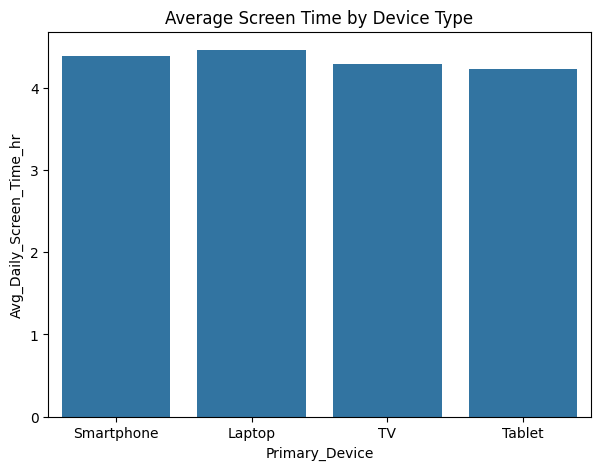

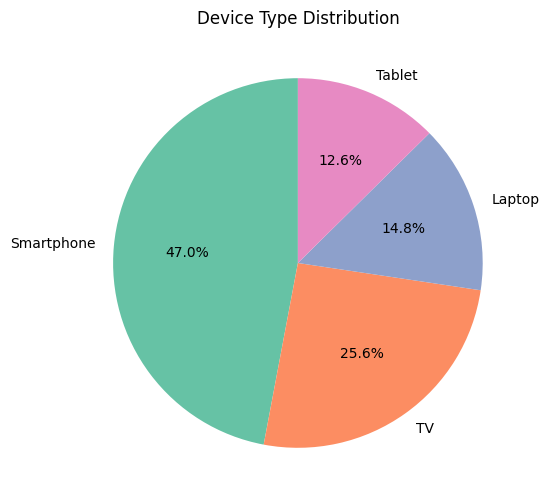

Insight:
Portable device users (~4.39 hrs) spend more time than fixed device users (~4.30 hrs).
Portability leads to more frequent usage, making it a major factor in high screen exposure.



In [23]:
# Device Type vs Screen Time

plt.figure(figsize=(7,5))
sns.barplot(x="Primary_Device", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Device Type")
plt.show()

# Pie chart for distribution
device_counts = df["Primary_Device"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Device Type Distribution")
plt.show()

print("Insight:")
print("Portable device users (~4.39 hrs) spend more time than fixed device users (~4.30 hrs).")
print("Portability leads to more frequent usage, making it a major factor in high screen exposure.\n")

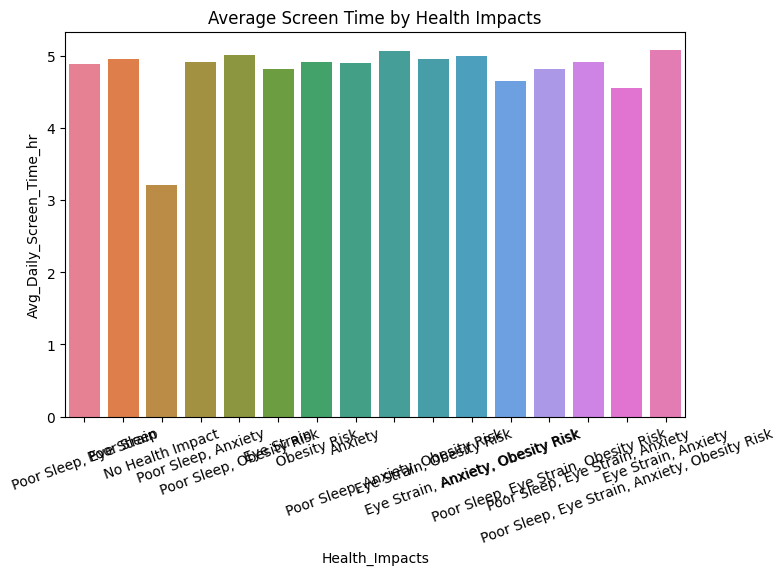

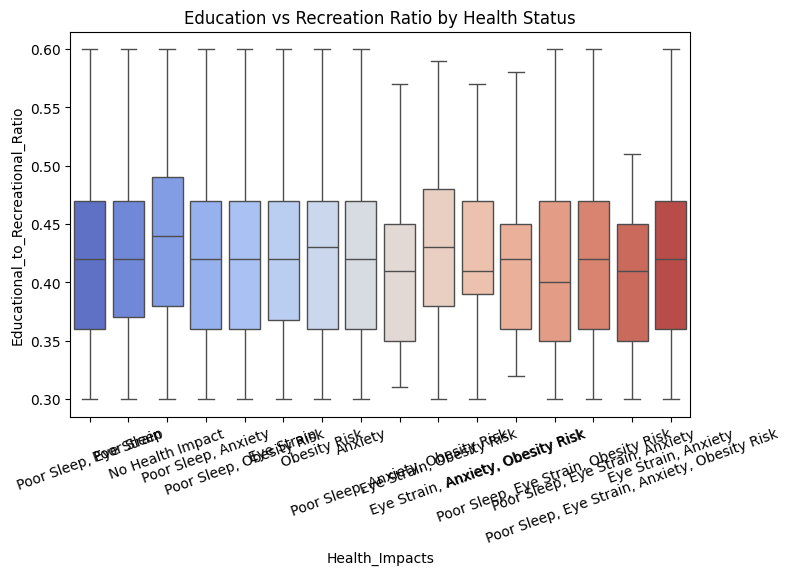

 Insight:
People with mental or physical health issues have the highest screen time (~4.9 hrs).
High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.



In [24]:
# Health Status vs Screen Time

plt.figure(figsize=(8,5))
sns.barplot(x="Health_Impacts", y="Avg_Daily_Screen_Time_hr", hue="Health_Impacts", data=df, errorbar=None)
plt.title("Average Screen Time by Health Impacts")
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Health_Impacts", y="Educational_to_Recreational_Ratio",hue="Health_Impacts", data=df, palette="coolwarm")
plt.title("Education vs Recreation Ratio by Health Status")
plt.xticks(rotation=20)
plt.show()

print(" Insight:")
print("People with mental or physical health issues have the highest screen time (~4.9 hrs).")
print("High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.\n")

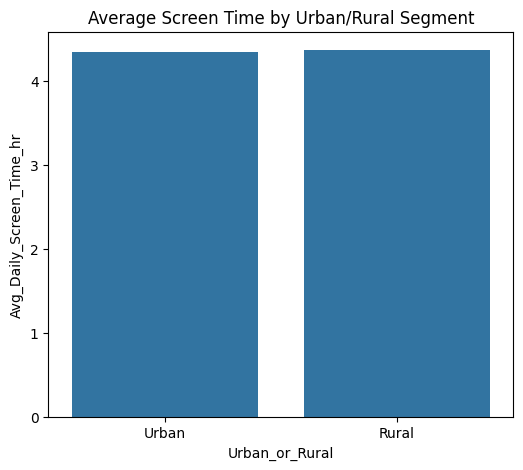

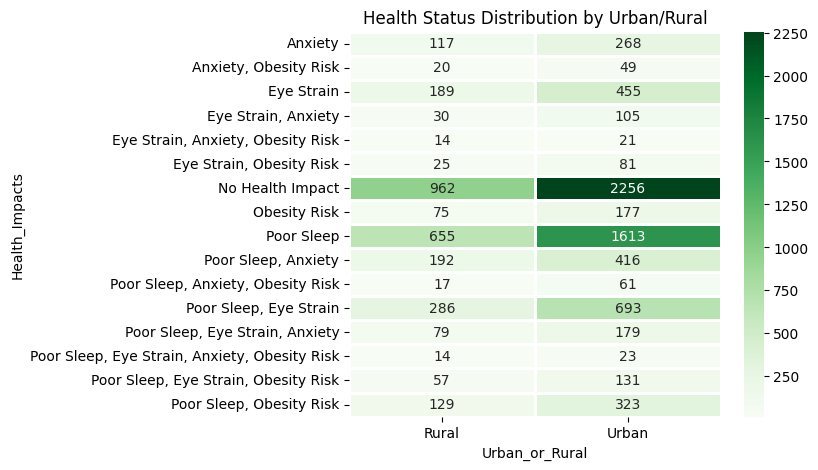

Insight:
Screen time between Urban (~4.36 hrs) and Rural (~4.38 hrs) users is nearly identical.
Technology access has equalized, bridging the digital divide between cities and rural areas.



In [26]:
# Urban vs Rural

plt.figure(figsize=(6,5))
sns.barplot(x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Urban/Rural Segment")
plt.show()

# Heatmap of health status distribution by location
ct = pd.crosstab(df["Health_Impacts"], df["Urban_or_Rural"])
plt.figure(figsize=(6,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Status Distribution by Urban/Rural")
plt.show()

print("Insight:")
print("Screen time between Urban (~4.36 hrs) and Rural (~4.38 hrs) users is nearly identical.")
print("Technology access has equalized, bridging the digital divide between cities and rural areas.\n")

In [27]:
insight_table = pd.DataFrame({
    "Segment": ["Age Group", "Gender", "Device Type", "Health Status", "Urban/Rural"],
    "Key Finding": [
        "Late Teens have the highest screen time (4.53 hr)",
        "Males and Females show minimal difference",
        "Portable devices lead over Fixed devices",
        "Mental health groups record highest averages",
        "Urban and Rural averages nearly identical"
    ]
})
insight_table

,Segment,Key Finding
0,Age Group,Late Teens have the highest screen time (4.53 hr)
1,Gender,Males and Females show minimal difference
2,Device Type,Portable devices lead over Fixed devices
3,Health Status,Mental health groups record highest averages
4,Urban/Rural,Urban and Rural averages nearly identical


In [ ]:
Users with mental or physical health issues (around 4.9 hrs).
Portable device users, who use screens more frequently throughout the day.
Older age groups (Teenagers and Late Teens) with more independent access.